# Problem-2
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

In [76]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np


# EDA

In [3]:
ls

 Volume in drive C is ssd
 Volume Serial Number is 344C-651C

 Directory of C:\Users\phoneclicker\Downloads\excelr_kd\ASSIGNMENT\mlr

01/02/2023  06:27 PM    <DIR>          .
01/02/2023  06:27 PM    <DIR>          ..
12/01/2022  01:59 PM    <DIR>          .ipynb_checkpoints
11/29/2022  03:33 PM             2,436 50_Startups.csv
01/02/2023  06:27 PM           172,314 mlr_assignment_50startups.ipynb
01/02/2023  05:35 PM         1,223,365 mlr_assignment_toyota.ipynb
11/29/2022  03:33 PM               468 proble_statement(50_startups).txt
11/29/2022  03:33 PM             1,752 Toyota Corolla.txt
11/29/2022  03:33 PM           224,041 ToyotaCorolla.csv
               6 File(s)      1,624,376 bytes
               3 Dir(s)  20,331,089,920 bytes free


In [23]:
df=pd.read_csv("50_Startups.csv")

In [24]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [25]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [27]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
df.shape

(50, 5)

In [29]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Feature Engineering

In [30]:
data=pd.DataFrame(df)
df=data.drop(["State"],axis=1)

In [32]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Feature Renaming

In [51]:
df=df.rename({'R&D Spend':"rds",'Administration':"adm",'Marketing Spend':'ms','Profit':'pr'},axis='columns')

In [52]:
df.head()

,rds,adm,ms,pr
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Visualization

<Figure size 576x576 with 0 Axes>

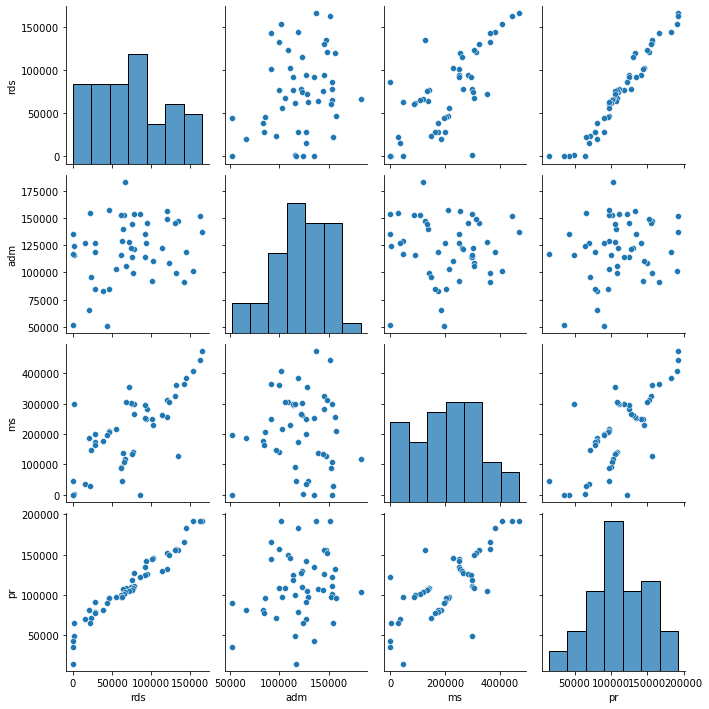

In [48]:
plt.figure(figsize=(8,8))
sn.pairplot(df)

<AxesSubplot:>

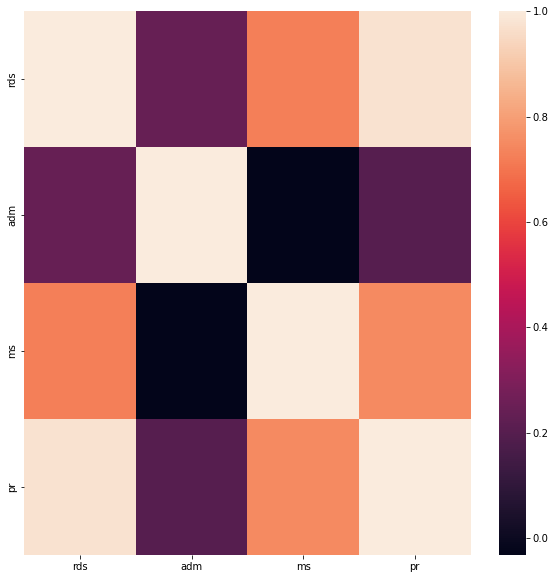

In [49]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr())

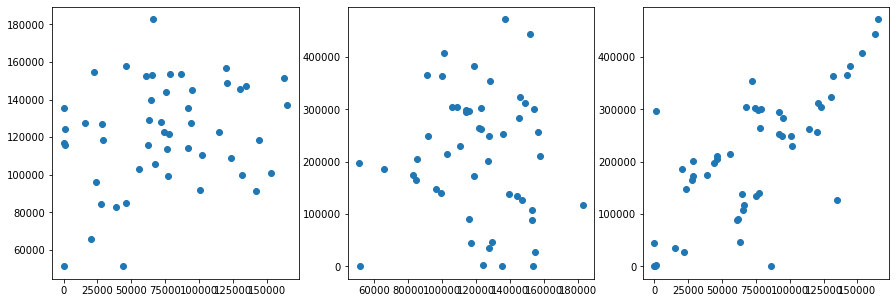

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df['rds'],df['adm'])
plt.subplot(1,3,2)
plt.scatter(df['adm'],df['ms'])
plt.subplot(1,3,3)
plt.scatter(df['rds'],df['ms'])

# Model Building

In [66]:
first_model=smf.ols("pr~rds+adm+ms",data=df).fit()

# Testing model

In [67]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pr   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        19:10:08   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rds            0.8057      0.045     17.846      0.000       0.715       0.897
adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
ms             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation

In [69]:
rsq_Rds = smf.ols("rds~adm+ms",data=df).fit().rsquared  
vif_Rds = 1/(1-rsq_Rds)

rsq_Adms = smf.ols("adm~rds+ms",data=df).fit().rsquared  
vif_Adms = 1/(1-rsq_Adms) 

rsq_Ms = smf.ols("ms~rds+adm",data=df).fit().rsquared  
vif_Ms = 1/(1-rsq_Ms) 

# Storing vif values in a data frame
d1 = {'Variables':['rds','adm','ms'],'VIF':[vif_Rds,vif_Adms,vif_Ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rds,2.468903
1,adm,1.175091
2,ms,2.326773


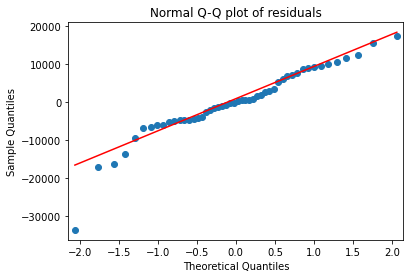

In [73]:
sm.qqplot(first_model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [77]:
list(np.where(first_model.resid<-30000))

[array([49], dtype=int64)]

# Residual plot for Homoscedasticity

In [78]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

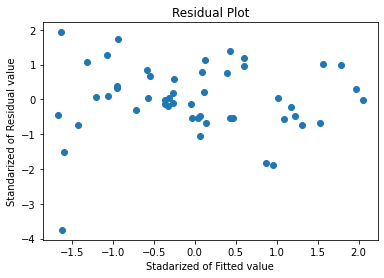

In [79]:
plt.scatter(get_standardized_values(first_model.fittedvalues),get_standardized_values(first_model.resid))
plt.title('Residual Plot')
plt.xlabel("Stadarized of Fitted value")
plt.ylabel("Standarized of Residual value")
plt.show()

# Residual Vs Regression


eval_env: 1


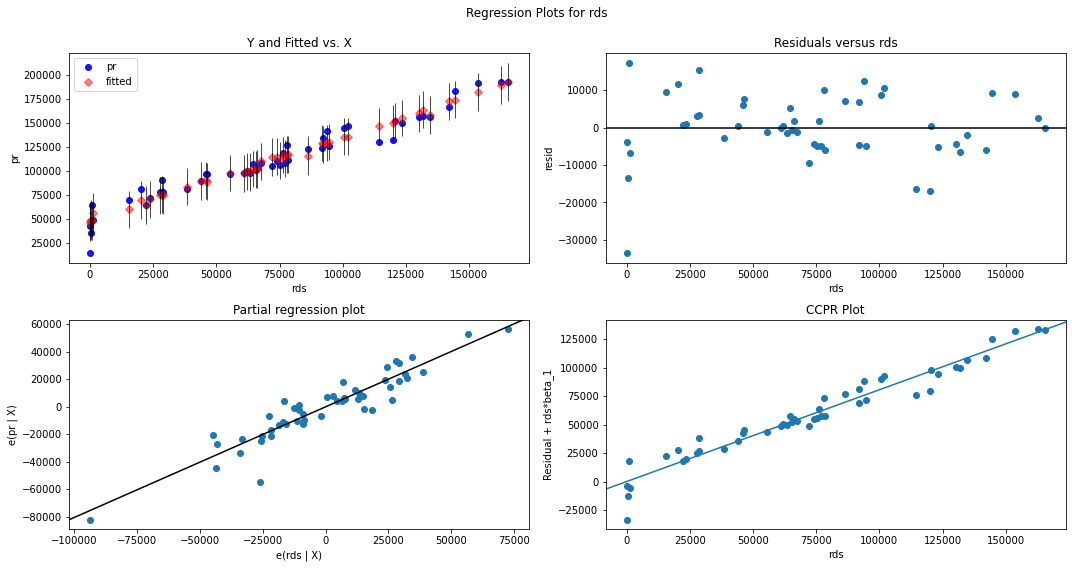

In [80]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(first_model, "rds", fig=fig)
plt.show()


eval_env: 1


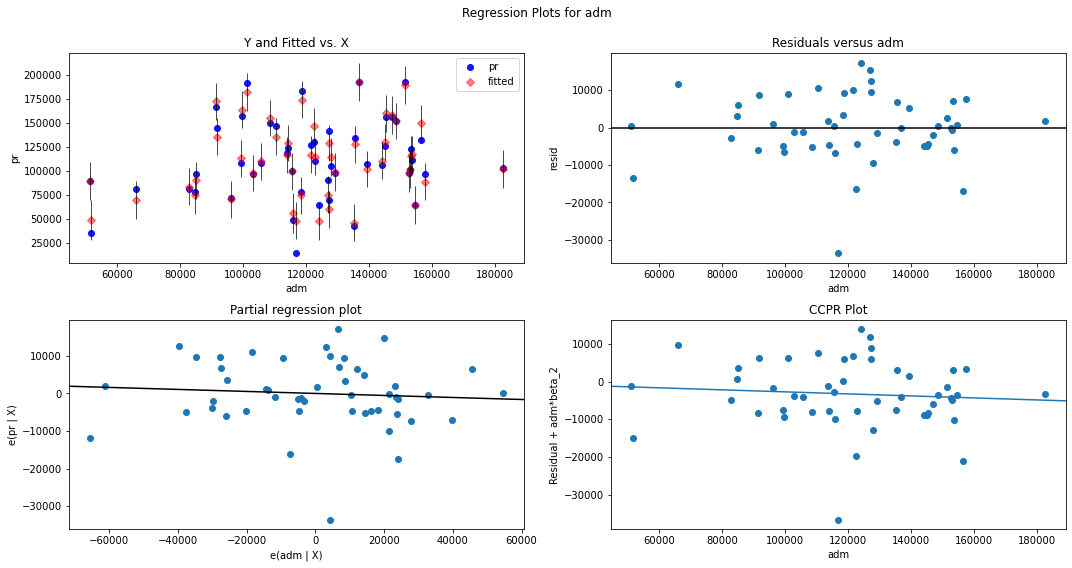

In [81]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(first_model, "adm", fig=fig)
plt.show()


eval_env: 1


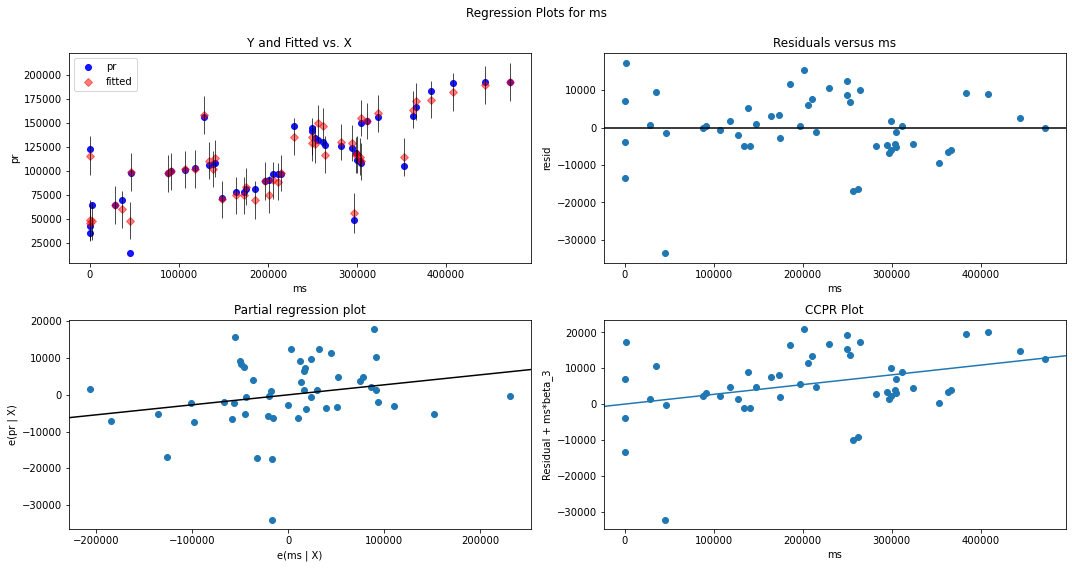

In [82]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(first_model, "ms", fig=fig)
plt.show()


# Model deletion diagnostics(Checking Outliers and Influencers)

In [85]:
model_influence=first_model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

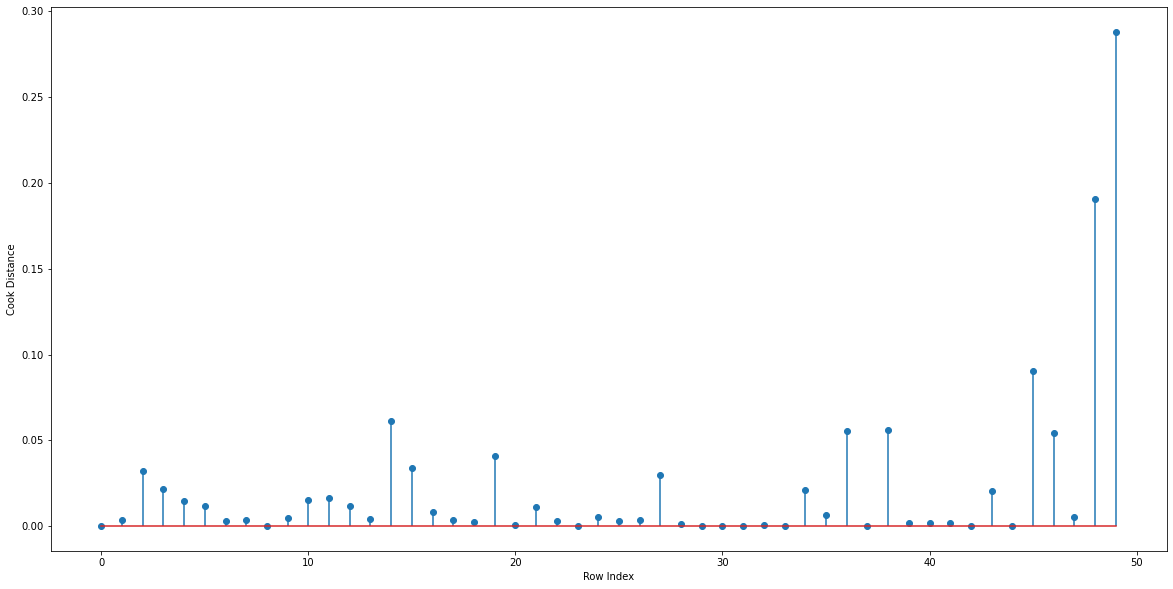

In [86]:
fig=plt.figure(figsize=(20,10))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cook Distance')
plt.show()

In [87]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

In [88]:
np.where(c>0.05)

(array([14, 36, 38, 45, 46, 48, 49], dtype=int64),)

# improoving Model

In [90]:
df2=df.drop(df.index[[14,36,38,45,46,49]],axis=0).reset_index(drop=True)
df2.head()

,rds,adm,ms,pr
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rds     44 non-null     float64
 1   adm     44 non-null     float64
 2   ms      44 non-null     float64
 3   pr      44 non-null     float64
dtypes: float64(4)
memory usage: 1.5 KB


# Building Final Model

In [97]:
second_model=smf.ols("pr~rds+adm+ms",data=df).fit()

In [98]:
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pr   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        19:26:12   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rds            0.8057      0.045     17.846      0.000       0.715       0.897
adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
ms             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Table of R squared of basic model and final model

In [100]:
d2={"Models":['Basic Model','Final Model'],"R Squared":[first_model.rsquared,second_model.rsquared]}
table=pd.DataFrame(d2)
print(table)

        Models  R Squared
0  Basic Model   0.950746
1  Final Model   0.950746


# Model Prediction

In [101]:
new_data=pd.DataFrame({'rds':90000,"adm":100000,"ms":150000},index=[0])
new_data

,rds,adm,ms
0,90000,100000,150000
